# Jacobi original

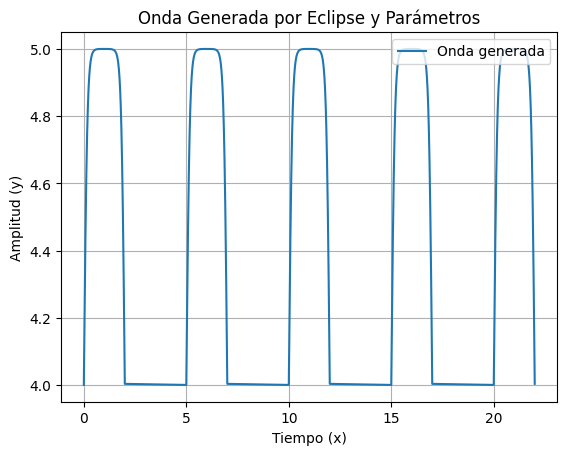

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ellipk, ellipj

# Función step equivalente
def step(x):
    return 1 if x >= 0 else 0

# Función principal jacobi
def jacobi(A, m, E, S, R, V, W):
    k = np.sqrt(m)  # m = k^2, así que k = sqrt(m)
    PHI = np.pi / 2
    x_vals = []
    y_vals = []

    # Cálculo de la integral elíptica completa de primer tipo
    K_value = ellipk(m)

    for n in range(int(W)):
        # Genera valores de u para un solo periodo y ajusta el desplazamiento para el siguiente periodo
        u_vals = np.arange(0, 2.0 * K_value, R)
        
        for u in u_vals:
            # Calcula las funciones elípticas sn, cn y dn
            sn, cn, dn, ph = ellipj(u, m)
            # Onda cuadrada
            square_wave = step(u) - step(u - 2 * K_value)
            # Coordenadas
            x = E * u / (2 * K_value) + (E + S) * n
            y = square_wave * sn * A + V
            x_vals.append(x)
            y_vals.append(y)

    return np.array(x_vals), np.array(y_vals)

# Función para capturar los inputs
def enter():
    A = float(input("Ingresa la amplitud del eclipse:\n"))
    E = float(input("Ingresa el periodo del eclipse:\n"))
    S = float(input("Ingresa el periodo no eclipsado:\n"))
    V = float(input("Ingresa el traslado vertical:\n"))
    W = float(input("Ingresa el número de eclipses:\n"))
    R = float(input("Ingresa la resolución:\n"))
    m = float(input("Ingresa el módulo (0 < m < 1):\n"))
    
    x_vals, y_vals = jacobi(A, m, E, S, R, V, W)
    
    # Graficar los resultados
    plt.plot(x_vals, y_vals, label="Onda generada")
    plt.xlabel('Tiempo (x)')
    plt.ylabel('Amplitud (y)')
    plt.title('Onda Generada por Eclipse y Parámetros')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    enter()


# Jacobi modificada con Jacobi invertida

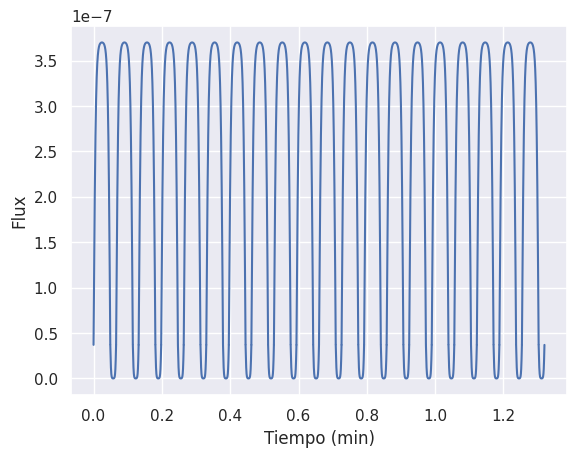

Datos guardados en el archivo: jacobi_3.7e-07_E0.049_S0.017_m0.99_W20.0_desplazamiento10.0.dat


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import ellipk, ellipj

# Establecer el estilo darkgrid de seaborn
sns.set(style="darkgrid")

# Función principal jacobi (onda normal)
def jacobi(A, m, E, S, W, desplazamiento):
    k = np.sqrt(m)  # m = k^2, así que k = sqrt(m)
    x_vals = []
    y_vals = []

    # Cálculo de la integral elíptica completa de primer tipo
    K_value = ellipk(m)
    A_no_invertida = A - desplazamiento  # Amplitud para la onda no invertida ajustada

    for n in range(int(W)):
        # Genera valores de u para un solo periodo y ajusta el desplazamiento para el siguiente periodo
        u_vals = np.arange(0, 2.0 * K_value, 0.01)  # R = 0.01 es fijo
        
        for u in u_vals:
            # Calcula las funciones elípticas sn, cn y dn
            sn, cn, dn, ph = ellipj(u, m)
            # Coordenadas (usando E como el periodo del eclipse y S como el periodo no eclipsado)
            x = E * u / (2 * K_value) + (E + S) * n
            y = sn * A_no_invertida  # Ajuste de amplitud
            y = y + desplazamiento  # Desplazamiento hacia arriba
            x_vals.append(x)
            y_vals.append(y)
        
        # Insertar NaN para crear separación y evitar líneas de conexión
        x_vals.append(np.nan)
        y_vals.append(np.nan)

    return np.array(x_vals), np.array(y_vals)

# Función jacobi invertida (reflejada verticalmente, desplazada hacia arriba)
def jacobi_invertida(A, m, E, S, W, desplazamiento):
    k = np.sqrt(m)  # m = k^2, así que k = sqrt(m)
    x_vals = []
    y_vals = []

    # Cálculo de la integral elíptica completa de primer tipo
    K_value = ellipk(m)
    A_invertida = desplazamiento  # Amplitud para la onda invertida ajustada

    for n in range(int(W)):
        # Genera valores de u para un solo periodo y ajusta el desplazamiento para el siguiente periodo
        u_vals = np.arange(0, 2.0 * K_value, 0.01)  # R = 0.01 es fijo
        
        for u in u_vals:
            # Calcula las funciones elípticas sn, cn y dn
            sn, cn, dn, ph = ellipj(u, m)
            # Coordenadas (usando S como el periodo del eclipse y E como el periodo no eclipsado)
            x = S * u / (2 * K_value) + (S + E) * n
            y = sn * A_invertida
            y = -y + desplazamiento  # Reflejar la onda verticalmente y desplazar hacia arriba
            x = x + E  # Desplazamiento hacia la derecha para alineación
            x_vals.append(x)
            y_vals.append(y)

        # Insertar NaN para crear separación y evitar líneas de conexión
        x_vals.append(np.nan)
        y_vals.append(np.nan)

    return np.array(x_vals), np.array(y_vals)

# Función para capturar los inputs, graficar y guardar los resultados
def enter():
    A = float(input("Ingresa la amplitud total (A):\n"))
    E = float(input("Ingresa el periodo del eclipse (E):\n"))
    S = float(input("Ingresa el periodo no eclipsado (S):\n"))
    m = float(input("Ingresa el módulo (0 < m < 1):\n"))
    W = float(input("Ingresa el número de eclipses:\n"))
    porcentaje_desplazamiento = float(input("Ingresa el porcentaje de desplazamiento (de 0 a 100):\n"))

    # Calcular el desplazamiento en función del porcentaje ingresado
    desplazamiento = A * porcentaje_desplazamiento / 100
    
    # Generar ambas ondas
    x_vals_normal, y_vals_normal = jacobi(A, m, E, S, W, desplazamiento)
    x_vals_invertida, y_vals_invertida = jacobi_invertida(A, m, E, S, W, desplazamiento)
    
    # Graficar la onda normal
    plt.plot(x_vals_normal, y_vals_normal, linestyle='-', color='b', label="Onda Normal")
    
    # Graficar la onda invertida
    plt.plot(x_vals_invertida, y_vals_invertida, linestyle='-', color='b', label="Onda Invertida")
    
    # Configurar gráfico
    plt.xlabel('Tiempo (min)')
    plt.ylabel('Flux')
    # plt.legend(loc='upper right')
    plt.grid(True)
    
    # Mostrar la gráfica
    plt.show()

    # Crear el nombre del archivo basado en los parámetros de entrada
    filename = f"jacobi_{A}_E{E}_S{S}_m{m}_W{W}_desplazamiento{porcentaje_desplazamiento}.dat"
    
    # Guardar los datos en un archivo .dat
    with open(filename, 'w') as f:
        f.write("# Tiempo (MJD) y Flux\n")
        for x, y in zip(x_vals_normal, y_vals_normal):
            f.write(f"{x}\t{y}\n")
        for x, y in zip(x_vals_invertida, y_vals_invertida):
            f.write(f"{x}\t{y}\n")

    print(f"Datos guardados en el archivo: {filename}")

if __name__ == "__main__":
    enter()


# Fórmulas Matemáticas

A continuación, se presentan las fórmulas matemáticas utilizadas en el código para calcular las ondas normal e invertida:

## 1. Cálculo de la onda normal (sin invertir)

La coordenada \( x_n(u) \) para la onda normal se calcula como:

$$
x_n(u) = \frac{E \cdot u}{2K(m)} + (E + S) \cdot n
$$

donde:

- \( E \) es el periodo del eclipse.
- \( S \) es el periodo no eclipsado.
- \( K(m) \) es la integral elíptica de primer tipo.
- \( m \) es el parámetro del módulo, \( 0 < m < 1 \).
- \( u \) es el argumento de la función elíptica de Jacobi.
- \( n \) es el índice del ciclo de la onda.

La coordenada \( y_n(u) \) para la onda normal es:

$$
y_n(u) = \text{sn}(u, m) \cdot (A - \text{desplazamiento}) + \text{desplazamiento}
$$

donde:

- \( \text{sn}(u, m) \) es la función elíptica de Jacobi (seno elíptico).
- \( A \) es la amplitud total de la onda.
- \( \text{desplazamiento} \) es el desplazamiento ajustado de la onda, calculado como un porcentaje de \( A \).

## 2. Cálculo de la onda invertida (reflejada verticalmente)

La coordenada \( x_n(u) \) para la onda invertida se calcula como:

$$
x_n(u) = \frac{S \cdot u}{2K(m)} + (S + E) \cdot n + E
$$

donde:

- \( S \) y \( E \) son los periodos no eclipsado y del eclipse, respectivamente.
- \( K(m) \) es la integral elíptica de primer tipo.
- \( n \) es el índice del ciclo de la onda.
- \( u \) es el argumento de la función elíptica de Jacobi.

La coordenada \( y_n(u) \) para la onda invertida es:

$$
y_n(u) = -\text{sn}(u, m) \cdot \text{desplazamiento} + \text{desplazamiento}
$$

donde:

- \( \text{sn}(u, m) \) es la función elíptica de Jacobi.
- \( \text{desplazamiento} \) es el valor ajustado de desplazamiento, calculado como un porcentaje de \( A \).

## 3. Desplazamiento Ajustado

El desplazamiento es calculado como un porcentaje de la amplitud total \( A \):

$$
\text{desplazamiento} = \frac{A \cdot \text{porcentaje}}{100}
$$
